In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as io

In [2]:
# Create linear dataset
X = np.arange(100)
random = np.random.uniform(-10,10, size=(100,))
y = .4 * X +3 + random
X = np.reshape(X, (X.shape[0], 1))
y = np.reshape(y, (y.shape[0], 1))
linear = {"X": X, "y": y}

def f(x, a, b, c, d):
    return a / (1. + np.exp(-c * (x - d))) + b

a, c = np.random.exponential(size=2)
b, d = np.random.randn(2)
n = 100
X = np.linspace(-10., 10., n)
y = f(X, a, b, c, d)
y = y + a * .2 * np.random.randn(n)

# create non-linear datasets
nonlinear = io.loadmat("./ex5data1.mat")

In [3]:
# # Generating data
# X = np.random.randn(100,1)
# c = np.random.uniform(-10,10,(100,))
# # adding another non-linear column
# X = np.hstack((X, X*X))

# y = (4*X[:,1] + c)

# # X = np.reshape(X, (X.shape[0], 1))
# y = np.reshape(y, (y.shape[0], 1))
# random = np.random.uniform(-10,10, size=(100,))
# nonlinear = {"X": X, "y": y}

In [4]:
print("Shape of linear input", linear["X"].shape, linear["y"].shape)
print("Shape of non-linear input", nonlinear["X"].shape, nonlinear["y"].shape)

Shape of linear input (100, 1) (100, 1)
Shape of non-linear input (12, 1) (12, 1)


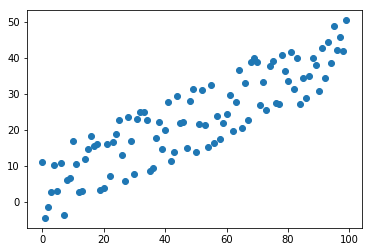

In [5]:
plt.figure(figsize=(6, 4))
plt.scatter(linear["X"], linear["y"])
plt.show()

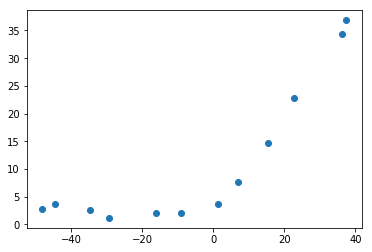

In [6]:
plt.figure(figsize=(6, 4))
plt.scatter(nonlinear["X"], nonlinear["y"])
plt.show()

In [7]:
class LinearRegression:
    def __init__(self, alpha= 0.0001, n_iters = 100, beta = 0):
        self.n_iters_ = n_iters
        self.alpha_ = alpha
        self.beta_ = beta
    
    def fit(self, X, y):
        m = X.shape[0]
        
        # Adding bias term
        X = np.column_stack((np.ones((m, 1)), X))
        
        # Coeficients
        self.coef_ = np.ones((X.shape[1], 1))
          
        cost = []
        # Linear form
        h_x = np.dot(X, self.coef_)
            
        for epoch in range(self.n_iters_):
            # Linear form
            h_x = np.dot(X, self.coef_)
            
            # calculating regularized cost
            reg = (float(self.beta_) / (2 * m)) * np.sum(np.power((self.coef_[1:self.coef_.shape[0]]), 2))
            
            # Cost function
            J = (1./(2 * m)) * np.sum(np.power((h_x - y), 2)) + reg
            
            # Gradient descent
            self.coef_ = self.coef_ - self.alpha_ * ((1./m) *  np.dot(X.T, h_x - y)) + \
                        (float(self.beta_) / m) * self.coef_
            # unregularize first gradient
            self.coef_[0] = ((1./m) *  np.dot(X.T, h_x - y))[0]
            cost.append(J)
            
        return self.coef_, cost
    
    def predict(self, X):
        m = X.shape[0]
        # Adding bias term
        X = np.column_stack((np.ones(m), X))
        return np.dot(X, self.coef_)

In [8]:
lr = LinearRegression()
theta, cost = lr.fit(linear["X"], linear["y"])
y_pred = lr.predict(linear["X"])

In [9]:
theta

array([[-0.81948526],
       [ 0.46840313]])

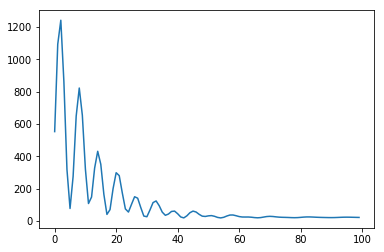

In [10]:
plt.plot(cost)
plt.show()

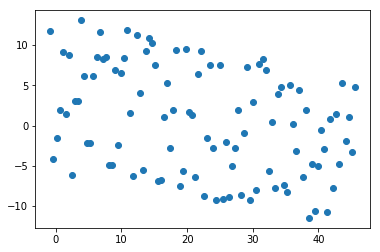

In [11]:
# plotting linear residuals vs predicted
plt.plot()
plt.scatter(y_pred, (linear["y"] - y_pred))
plt.show()

In [12]:
theta, cost = lr.fit(nonlinear["X"], nonlinear["y"])

In [13]:
y_pred = lr.predict(nonlinear["X"])

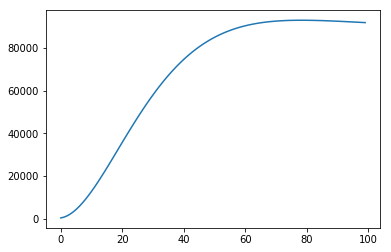

In [14]:
plt.plot(cost)
plt.show()

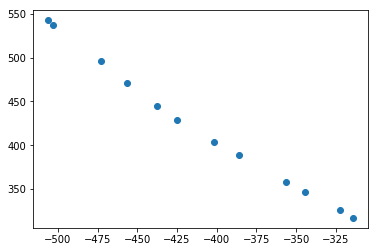

In [15]:
# plotting residuals vs predicted
plt.plot()
plt.scatter(y_pred, (nonlinear["y"] - y_pred))
plt.show()